# <center>Advanced Statistic Inference - Assessed Exercise 2016/2017</center>
### <center> Wentai CHEN</center>
### 1. Download the MNIST and CIFAR10 datasets and import them. 

In [115]:
'''download and read themnist file'''
import gzip
import os
import numpy as np
from six.moves import urllib
SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
DATA_DIRECTORY = 'data'
IMAGE_SIZE = 28
def download(filename):
    filepath = os.path.join(DATA_DIRECTORY, filename)
    filepath, _ = urllib.request.urlretrieve(SOURCE_URL + filename, filepath)
    print('Successfully downloaded', filename)
    return filepath
def extract_data(filename, num_images):
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    print("SUCCESS!")
    return data
def extract_labels(filename,num_labels):
    print("Extracting",filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(num_labels)
        labels = np.frombuffer(buf,dtype = np.uint8).astype(np.int64)
    print("SUCCESS!")
    return labels
train_data_filename = download('train-images-idx3-ubyte.gz')
train_labels_filename = download('train-labels-idx1-ubyte.gz')
test_data_filename = download('t10k-images-idx3-ubyte.gz')
test_labels_filename = download('t10k-labels-idx1-ubyte.gz')
train_data = extract_data(train_data_filename,60000)
train_labels = extract_labels(train_labels_filename, 60000)
test_data = extract_data(test_data_filename,10000)
test_labels = extract_labels(test_labels_filename, 10000)

Successfully downloaded train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz
Extracting data\train-images-idx3-ubyte.gz
SUCCESS!
Extracting data\train-labels-idx1-ubyte.gz
SUCCESS!
Extracting data\t10k-images-idx3-ubyte.gz
SUCCESS!
Extracting data\t10k-labels-idx1-ubyte.gz
SUCCESS!


In [116]:
'''This is a quick extract cell to extract the variable based the already-downloaded file'''
import gzip
import numpy as np
IMAGE_SIZE = 28
def extract_data(filename, num_images):
    """Extract the images into a 4-dimensional numpy array [image index, y, x, channels].
    Values are rescaled from [0, 255] down to [-0.5, 0.5].
    """
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    print("SUCCESS!")
    return data

def extract_labels(filename,num_labels):
    """Extract the labels to a vector of int64 label IDs"""
    print("Extracting",filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(num_labels)
        labels = np.frombuffer(buf,dtype = np.uint8).astype(np.int64)
    print("SUCCESS!")
    return labels
train_data = extract_data('data/train-images-idx3-ubyte.gz',60000)

train_labels = extract_labels('data/train-labels-idx1-ubyte.gz', 60000)

test_data = extract_data('data/t10k-images-idx3-ubyte.gz',10000)

test_labels = extract_labels('data/t10k-labels-idx1-ubyte.gz', 10000)

Extracting data/train-images-idx3-ubyte.gz
SUCCESS!
Extracting data/train-labels-idx1-ubyte.gz
SUCCESS!
Extracting data/t10k-images-idx3-ubyte.gz
SUCCESS!
Extracting data/t10k-labels-idx1-ubyte.gz
SUCCESS!


In [117]:
'''Load the CIFAR 10 dataset'''
#library import, macro define
import os
data_path = 'data/'
filename = ''
def unpickle(filename):
    import pickle
    file_path = os.path.join(data_path, "cifar-10-batches-py/", filename)    
    with open(file_path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data_batch_1 = unpickle('data_batch_1')
data_batch_2 = unpickle('data_batch_2')
data_batch_3 = unpickle('data_batch_3')
data_batch_4 = unpickle('data_batch_4')
data_batch_5 = unpickle('data_batch_5')
test_batch = unpickle('test_batch')
batch_names = unpickle('batches.meta')

## 2. The distribution of class labels and the dimensionality of the input and how these may affect the analysis. 

### 2.1 MNIST data set
  
The dataset is divided into training set(60,000 samples) and test set(10,000 samples), and each data point is noted as images and labels separately. The shape of one single input data point is (28,28,1), in which 28 and 28 mean that the size of one single image is 28 * 28, and the last 1-dimension value indicates the grey value of the picture.  
  
In order to observe the distribution of the train data, the number of the labels is ploted as below





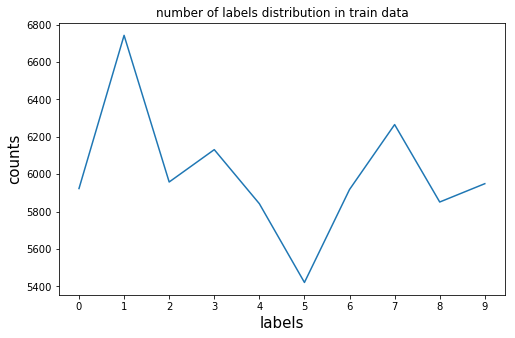

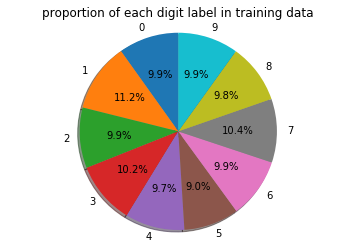

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import operator
from itertools import groupby
#groupby the labels and count the total number of each label
sorted_train_labels = sorted(train_labels)
groups = ((k,sum(1 for i in g)) for k,g in groupby(sorted_train_labels))
index = np.fromiter(groups,dtype='u4,u2')
distr = [v for (k,v) in index]

#plot the data
plt.figure(figsize = (8,5))
plt.plot(distr)
plt.xticks(range(0,10,1))
plt.xlabel('labels',fontsize = 15)
plt.ylabel('counts',fontsize = 15)
plt.title('number of labels distribution in train data')
plt.show()

labels = range(10)
fig1, ax1 = plt.subplots()
ax1.pie(distr, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('proportion of each digit label in training data')
plt.show()

In the two figures above, we observe that the distribution of the training labels are nearly uniform, and each label counts for around 10% of the total sample. 

### 2.2 CIFAR 10 dataset  
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.  
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.  
Each of the batch files contains a dictionary with the following elements:
data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.  
more detailed description please refers to https://www.cs.toronto.edu/~kriz/cifar.html

In [119]:
#List the names of the keys of the dictionary
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [120]:
#print the content of each value corresponding to each key
print("batch label:",data_batch_1[b'batch_label'])
print('data labels:',data_batch_1[b'labels'][0:10])
print('data:',data_batch_1[b'data'][0])
print('filenames:',data_batch_1[b'filenames'][0:10])
print('batch names:',batch_names)

batch label: b'training batch 1 of 5'
data labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
data: [ 59  43  50 ..., 140  84  72]
filenames: [b'leptodactylus_pentadactylus_s_000004.png', b'camion_s_000148.png', b'tipper_truck_s_001250.png', b'american_elk_s_001521.png', b'station_wagon_s_000293.png', b'coupe_s_001735.png', b'cassowary_s_001300.png', b'cow_pony_s_001168.png', b'sea_boat_s_001584.png', b'tabby_s_001355.png']
batch names: {b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


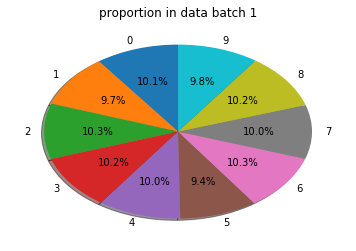

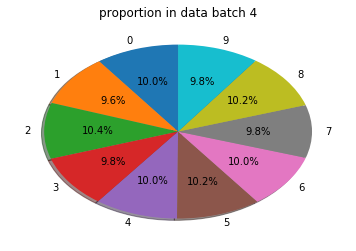

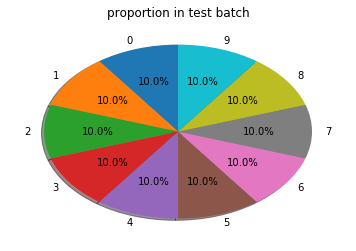

In [121]:
#proportion of data batch 1
sorted_train_labels = sorted(data_batch_1[b'labels'])
groups = ((k,sum(1 for i in g)) for k,g in groupby(sorted_train_labels))
index = np.fromiter(groups,dtype='u4,u2')
distr = [v for (k,v) in index]
labels = range(10)
plt.pie(distr,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion in data batch 1')
plt.show()

#proportion of data batch 4
sorted_train_labels = sorted(data_batch_4[b'labels'])
groups = ((k,sum(1 for i in g)) for k,g in groupby(sorted_train_labels))
index = np.fromiter(groups,dtype='u4,u2')
distr = [v for (k,v) in index]

labels = range(10)

plt.pie(distr,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion in data batch 4')
plt.show()

#proportion of test batch
sorted_train_labels = sorted(test_batch[b'labels'])
groups = ((k,sum(1 for i in g)) for k,g in groupby(sorted_train_labels))
index = np.fromiter(groups,dtype='u4,u2')
distr = [v for (k,v) in index]

labels = range(10)

plt.pie(distr,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion in test batch')
plt.show()

As the pie charts show above, the distribution of data in training set is not exactly uniform, but with some slight differnence. Whereas in the test set the distribution is strictly uniform, which accords with the description before.  
### 2.3 How the data's distribution will affect the analysis  
If the data are uniformly distributed, the classifier will learn through a general dataset, which can avoid overfitting to the training data. Otherwise, the training data is a kind of outlier, so classifier will fit into the training set and won't be able to generate well on other dataset, aka over fitting problem.

## 3. Classification
In this section, we will implement the Naïve Bayes classifier, and apply it to the two datasets and do the optimization.
### 3.1 Naïve Bayes classifier

#### 3.1.1. Introduction
In machine learninig, Naïve Bayes classifiers are a falmily of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features.  
  
  
Naïve Bayes classifiers are highly scalable, requiring a number of parameters **linear** in the number of variables in a learning problem. Also, Maximum-likelihood training can be done by evaluating a closed-form expression, which takes **linear time**, compared with expensive **iterative approximation** in other types of classifiers.
  
  
#### 3.1.2.Prerequisite
**a)** Models that assign class labels to problem instances. These instances are represented as vectors of feature values and the class labels are drawn from some finite set.
  
**b)** The value of a particular feature is **independent** of the value of any other feature.
  
  
#### 3.1.3 Probabilistic model & Decision rule
Given a problem instance to be classified, represented by a vector **x** = (x<sub>1</sub>,...,x<sub>n</sub>) indicating some n features (independent variables), it assigns to this instance probabilities  P(C<sub>k</sub>|x<sub>1</sub>,...,x<sub>n</sub>) = P(C<sub>k</sub>|**x**)
for each of k possible outcomes or classes **C**<sub>k</sub>  
  
According to the idea of Naïve Bayes Classifiers, after computing P(C<sub>1</sub>|**x**),...,P(C<sub>K</sub>|**x**), we find P(C<sub>m</sub>|**x**) = max{P(C<sub>1</sub>|**x**),P(C<sub>2</sub>|**x**),...,P(C<sub>K</sub>|**x**)}, so **x** is classified to class ```m```
  
#### 3.1.4 Implementation
When computing the probabilistic model above, if the number of features ```n``` is large or if a feature can take on a largen number of values, then basing such a model on probability tables is infeasible. Therefore we reformulate model to make it more tractable, using Bayes' theorem
  
According to Bayes conditional probability formula and the strong independence assumption: 
$$P(C_i|{\bf{x}}) = {\frac {P(\bf{x}|C_i)*P(C_i)} {P(\bf{x})} } ∝ P({\bf{x}}| C_i) * P(C_i) = P(C_i)*\prod_{j=1}^n {P(x_j|C_i)} \tag{3.1}$$


So, the whole Naïve Bayes Classifiers can be divided into 3 stages:  
##### 1)Preparation of the data  
Divide the data to trainging and test set, determine the features x<sub>1</sub>,...,x<sub>n</sub> to represent the data.  
**Input**: all the data to be classified;  
**Output**:traniging set and features
  
##### 2)Train the classifiers  
Generate the classifer by calculating the probabilities listed above.  
**Input**: features and training samples  
**output**：classifiers
  
##### 3)Application  
Apply the classifier on the dataset.  
**Input**: classifiers and data to be classified  
**output**: the relationship between data and the corresponding classes.

### 3.2 Describe a positive and a negative feature of the classifier for these tasks 
- **Positive feature** 
In spite of their apparently over-simplified assumptions, Naïve Bayes Classifiers have some good features and worked quite well in many real-world situations.  
**1.Simplicity in the dataset**  
They require a small amount of training data to estimate the necessary parameters.  
**2.Fast in computation**  
Naïve Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. Thanks to the assumption of the strong indenpendence on the features, the calculation of conditional probability can be solved by decoupling the conditional feature, then it can be converted to the sum of logarithm. This in turn helps to alleviate problems stemming from the curse of dimensionality.
  
- **Negative feature**
Although Naïve Bayes Classifiers is a simple and decent classifier in some certain cases, it is a bad estimator in general.  
**1.Low accuracy  **  
Naïve Bayes Classifiers makes a very strong assumption on the shape of the data distribution, i.e. any two features are independent given the output class. In our case, the data set is the pixels in one image, so it os  resonable to see that those pixels are correlated with each other, so using Naïve Bayes Classifiers on MNIST data and CIFAR 10 data is not proper. And the more complex the correlation is, the worse the reslut is. We can see that with simple MNIST hand written digital data we got a 84% accuracy(see the result below), but with a RGB image in CIFAR10, the accuracy is only around 29%.  
**2.Numerical instabilities **  
In Naïve Bayes method, the likelihood is estimated in a frequentist approach, i.e. by multiplying the posterior(s) and the prior. This can result in probabilities going towards 0 or 1, which in turn leads to numerical instabilities and worse results.In this case a smooth in the data is necessary. In the code below, we convert the probability from [0,1] to a integer, and implement the multiplication.  





### 3.3 Describe any data pre-processing that you suggest for this data and your classifier  
#### 3.2.1 MNIST data  
The loaded data formats are:  
```
trainging_data:      60,000*28*28*1  
trainging_labels:    60,000*1  
test_data:           10,000*28*28*1  
test_labels:         10,000*1 
```  
The preprocessing includes 2 parts:  
**1. Reshape  **
The data point is reshaped from `(28*28*1)` to `(28*28)`, which is necessary to feed in the calculation part.  
**2. Binarization.  **
The value of pixel is binarized, so that the gray scale value ranging from [0,255] is converted to one binary number 0/1. This reduces both the compution and the storage cost.  
#### 3.2.2 CIFAR 10 data   
The loaded data formats(**data_batch_1**) are:  
```
batch label: string
data labels: 10000
data: 10000 * 3072
filenames: 10000
batch names: dictionary,stored the standard name of each picture.
```    
Here in CIFAR 10 dataset, we have some difference  with the MNIST dataset. In MINIST data set, the value of each pixel is gray value(from 0 to 255) and then be binarized to 0 and 1. So when we calculate the posterior probability ${P(x_j|C_i)}$, we can compute simply by counting the number of each feature x<sub>j</sub> in the training data set. This method is also called **polynomial model of Naïve Bayes Classifier**   
  
  
However, in CIFAR 10 dataset the picture is much more complicated than the MNIST data. And correct prediction requires a higher precision, so we cannot simply do the binarization on each pixel, otherwise we will get a severe distortion. So instead of the polynomial method, we use the gaussian model to describe the data. In each image, we have 3072 pixels, which means 3072 features in total. Assuming each feature conforms to a gaussian distribution, so by computing the **mean $\mu$** and **variance $\sigma$**, we can get the posterior probability of each feature by
 ${P(x_j|C_i)} \sim \mathcal{N}(\mu_{ij},\,\sigma{ij}^{2}) $
 
  

In the following part, We will implement the Naïve Bayes classifier on the MNIST  and CIFAR-10 data set. 
### 3.4.1 Naïve Bayes Classifier on MNIST dataset  
#### 1. Implement the Naïve Bayes Classifier

In [122]:
'''Following are the function that will be used in the implementation'''
# Data binarization
def binarization(img):
    bi_img = img.copy()
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] >= threshold:
                bi_img[i][j] = 1
            else:
                bi_img[i][j] = 0
    return bi_img
#compute Pr
def compute_prior(labels):
    prior = np.zeros(num_labels)
    for i in labels: 
        prior[i] += 1
    return prior
              
def compute_posterior(data,labels):
    posteriori = np.zeros((num_labels,num_pixes,2))
    a = []
    for i in range(len(data)):
        a.append(data[i].flatten())
    a = np.array(a)
    for i in range(len(a)):
        for j in range(num_pixes):
            posteriori[labels[i]][j][a[i][j]] += 1  
    return posteriori

def multiply_pr(test_img,label):
    img1 = np.concatenate(test_img)
    pr = int(prior_pr[label])
    for i in range(len(img1)):
        #print(label,img1[i])
        pr = int(pr) * int(posterior_pr[label][i][np.int8(img1[i])])
    return pr

def predict(data,labels):
    for i in range(len(data)):
        max_label = 0
        max_pr = multiply_pr(data[i],0)
        for j in range(1,10):
            temp = multiply_pr(data[i],j)
            if temp > max_pr:
                max_label = j
                max_pr = temp
        predicted.append(max_label)
    return predicted



There are 3 steps in total: preprocessing； generating classifier；prediction and evaluation
### Step1 Prepocess the data  



In [123]:
'''import library, macro defining'''
import numpy as np
import pandas

threshold = 0.5*255
num_labels = 10
num_pixes = 784

In [124]:
'''Reshape and binarize the data'''
#reshape 
train_data = train_data.reshape(60000,28,28)
test_data = test_data.reshape(10000,28,28)

#binarization
train_sample = [binarization(point) for point in train_data]
test_sample = [binarization(point) for point in test_data]

### Step2 Train the naïve bayes classifier  
In this step, we calculate the prior and posteriori probability of the training data. To avoid the **accuracy loss** and **zero division**, we convert the probability from ```float``` [0,1] to ```int``` [1,10001]

In [125]:
'''Calculate the prior and posterior probability'''
prior_pr = compute_prior(train_labels)
posterior_pr = compute_posterior(train_sample,train_labels)
for i in range(num_labels):
    #normalize the posteriori to [1,10001]
    prior_pr[i] = float(prior_pr[i])/len(train_data)*100000+1
    for j in range(num_pixes):
        pix_0 = posterior_pr[i][j][0]
        pix_1 = posterior_pr[i][j][1]
        posterior_pr[i][j][0] = (float(pix_0)/float(pix_0+pix_1))*100000+1
        posterior_pr[i][j][1] = (float(pix_1)/float(pix_0+pix_1))*100000+1

C:\Users\cwent\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Step3 Prediction and evaluation
In this step, we will apply the naïve bayes classifier on the test data by compute the product listed in ``formula (3.1)``

In [126]:
'''Make prediction'''
predicted = []
result = predict(test_sample,test_labels)


After the steps before we get the prediction result. Here we calculate the **accuracy rate** and **log likelihood** to evaluate the model. 

In [127]:
'''compute accuracy rate'''
accuracy = 0
predicted = np.array(predicted)
for i in range(len(predicted)):
    if predicted[i] == test_labels[i]:
        accuracy += 1 
accuracy_rate = float(accuracy)/len(test_labels)
print("The accuracy is",accuracy_rate)

The accuracy is 0.8438


#### 2.Display the confusion matrix on the test data

Predicted    0     1    2     3    4    5    6    7    8     9    All
Actual                                                               
0          882     0    3     4    2   51   20    1   17     0    980
1            0  1086    6     5    0    9    4    0   25     0   1135
2           17    14  843    32   20    5   27   15   57     2   1032
3            3    17   36   842    1   30    8   13   41    19   1010
4            2     7    4     0  799    2   16    2   12   138    982
5           16    11    5   106   23  657   18    7   24    25    892
6           16    14   15     1   14   37  854    0    7     0    958
7            2    33   17     3   17    0    0  864   25    67   1028
8           10    28   12    68   15   28   10    6  762    35    974
9           11    13    6     8   63    9    0   29   21   849   1009
All        959  1223  947  1069  954  828  957  937  991  1135  10000


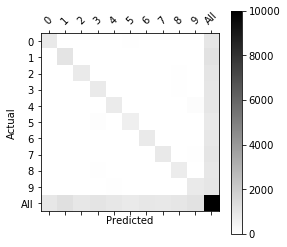

In [74]:
import pandas as pd
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
#     plt.figure(figsize=(10,10))
    plt.matshow(df_confusion, cmap=cmap) # imshow
    
    #plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

#### 3.Discuss the performance, compare them against a classifier that outputs random class labels, and suggest ways in which performance could be improved 
-  Discuss the performance  
The accuracy of Naïve Bayes Classifier on MNIST dataset is 0.8438. We can consider that for most of the images in the dataset(over 80%), the prediction is correct. In the front part we discussed that Naïve Bayes Classifier is not a good choice for image classification case. But for MNIST dataset, the pixel composition is quite simple, and after binarization we can still recgonize the number it represents, so we get a decent accuracy. However, due to the natural limitation of Naïve Bayes Classifier, the accuracy cannot reach higher on the MNIST dataset.   

- Compare against other classifier  
In the following part I implement a **random classifer that output the most frequent result**, and make the comparison with the Naïve Bayes Classifier.

In [186]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(train_sample, train_labels)
DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
score = clf.score(np.array(test_sample).reshape(10000,num_pixes), test_labels)  
print("final accuracy is:",score)

final accuracy is: 0.1135


- Ways to improve the performance  
In this code we did the binarization on the training data for simplicity. But this could omit some original information of the image. If we use the grey value of [0,255] instead the binarization value, we should get a better result, at the cost of more computation and storage.


### 3.4.2 Naïve Bayes Classifier on CIFAR 10 dataset   
#### 1.Implement the Naïve Bayes Classifier
Show the shape of data
 




In [106]:
print(np.shape(data_batch_1[b'labels']))
print(np.shape(data_batch_1[b'data']))
print(np.shape(data_batch_1[b'filenames']))
print(len(data_batch_1[b'filenames']))
print(batch_names)

(10000,)
(10000, 3072)
(10000,)
10000
{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


### Step1 Prepocess the data  
For the training and test parts, we only need the **data** and **label**   

In [107]:
CIFAR_data = data_batch_1[b'data']
CIFAR_labels = data_batch_1[b'labels']
print("data:",np.shape(CIFAR_data))
print("labels:",np.shape(CIFAR_labels))

data: (10000, 3072)
labels: (10000,)


### Step2 Train the naïve bayes classifier  


In [108]:
'''variables and functions that will be used'''
num_labels_CIFAR = 10
num_pixes_CIFAR = 3072
num_samples_CIFAR = 10000

def compute_prior(labels):
    prior = np.zeros(num_labels_CIFAR)
    for i in labels:
        prior[i] += 1
    for i in range(len(prior)):
        prior[i] /= float(len(labels))
    return prior
def compute_mean(data,labels):
    accu = np.zeros((num_labels_CIFAR,num_pixes_CIFAR))
    means = np.zeros((num_labels_CIFAR,num_pixes_CIFAR))
    num_index_mean = np.zeros((num_labels_CIFAR,num_pixes_CIFAR))
    for i in range(num_pixes_CIFAR):
        for j in range(num_samples_CIFAR):
            accu[labels[j]][i] += data[j][i]
            num_index_mean[labels[j]][i] +=1
    for i in range(num_labels_CIFAR):
        for j in range(num_pixes_CIFAR):
            means[i][j] = accu[i][j]/num_index_mean[i][j]
    return means
def compute_stddev(data,labels,means):
    stddev_pre = np.zeros((num_labels_CIFAR,num_pixes_CIFAR))
    stddevs = np.zeros((num_labels_CIFAR,num_pixes_CIFAR))
    num_index_stddev = np.zeros((num_labels_CIFAR,num_pixes_CIFAR))
    for i in range(num_pixes_CIFAR):
        for j in range(num_samples_CIFAR):
            stddev_pre[labels[j]][i] += (data[j][i]-means[labels[j]][i])**2
            num_index_stddev[labels[j]][i] +=1
    for i in range(num_labels_CIFAR):
        for j in range(num_pixes_CIFAR):
            stddevs[i][j] = np.sqrt(stddev_pre[i][j]/num_index_stddev[i][j])
    return stddevs
def gaussian(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
def compute_posterior(data,labels):
    pass

In [109]:
'''Calculate the prior probability and then compute the mean and variance of each feature to construct a gaussian model.'''
priors = compute_prior(CIFAR_labels)
means = compute_mean(CIFAR_data,CIFAR_labels)
stddevs = compute_stddev(CIFAR_data,CIFAR_labels,means)

### Step3 Predict the new data using naïve bayes classifier
In this step, we will apply the naïve bayes classifier on the test data and evaluate the model.

In [110]:
def multiply_pr_CIFAR(img,label):
    pr = int(priors[label])
    for i in range(len(img)):
        pr = pr * int(gaussian(img[i],means[label][i],stddevs[label][i])*1000000)
    return pr

def log_multiply_pr_CIFAR(img,label):
    pr = np.log(float(priors[label]))
    for i in range(len(img)):
        pr += np.log(gaussian(img[i],means[label][i],stddevs[label][i]))
    return pr

def predict_CIFAR(data,labels):
    predicted = []
    for i in range(len(data)):
        max_label = 0
        max_pr = log_multiply_pr_CIFAR(data[i],0)
        for j in range(1,10):
            temp = log_multiply_pr_CIFAR(data[i],j)
            if temp > max_pr:
                max_label = j
                max_pr = temp
        predicted.append(max_label)
    return predicted
# t0 = time.time()   
# predicted_2 = predict_CIFAR(CIFAR_data,CIFAR_labels)
# t1 = time.time()   
# print(t1-t0)

In [111]:
'''sample 1000 data for test'''
CIFAR_data_test = test_batch[b'data']
CIFAR_labels_test = test_batch[b'labels']
predicted_2 = predict_CIFAR(CIFAR_data_test[0:1000],CIFAR_labels_test[0:1000])

### Evaluate the accuracy
Here we use the test dataset to ecaluate the accuracy of the model.

In [52]:
flatten_data = CIFAR_labels_test
error = 0
for i in range(1000):
    if predicted_2[i]!=flatten_data[i]:
        error += 1
print (1-float(error)/1000)

0.29600000000000004


#### 2.Display the confusion matrix on the test data

Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   All
Actual                                                           
0           47    1    4    1    5    2    9    1   19   14   103
1           10   15    1    0    6    8   22    2   12   13    89
2           25    2    5    1   29    7   18    2    9    2   100
3           16    6    3    5   17   11   31    5    2    7   103
4           12    1    8    3   26    3   24    2    7    4    90
5           17    0    5    1   15   21   14    3    5    5    86
6           13    1    6    1   27    2   56    0    1    5   112
7           19    4    6    5   23    5    7   17    3   13   102
8           17    5    2    2    4    9    2    1   53   11   106
9            9    6    2    2    7    4   11    2   15   51   109
All        185   41   42   21  159   72  194   35  126  125  1000


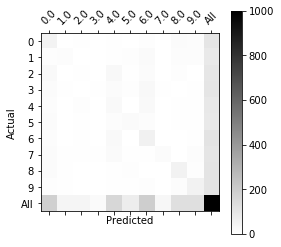

In [112]:
import pandas as pd
y_actu = pd.Series(CIFAR_labels_test, name='Actual')
y_pred = pd.Series(predicted_2, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
plot_confusion_matrix(df_confusion)

#### 3.Discuss the performance, compare them against a classifier that outputs random class labels, and suggest ways in which performance could be improved   
- Discuss the performance  
In CIFAR10 data set, we got the accuracy around 30%, which is much lower than in the MNIST dataset. This result is reasonable because in CIFAR10  dataset, we have a more complicated image composition. The images are RGB pictures instead of the grey value; also the target is a specific object like 'dog' or 'cat' rather than a single number, which is more difficult to recognize. So as a frequency-based method, Naive Bayes Classifier doestno't work well on this dataset.  
- Compare against other classifier  
Similar to MNIST data, we implement a **random classifer that output the most frequent result**, and make the comparison with the Naïve Bayes Classifier.

In [189]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(train_sample, train_labels)
DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
score = clf.score(np.array(CIFAR_data_test), CIFAR_labels_test)  
print("final accuracy is:",score)

final accuracy is: 0.1


This "most-frequent" mothod is worse than on the MNIST data, only get the accuracy of 0.1.  
- ways to improve performance  
Considering the fact that naive bayes is not a good model to classify CIFAR10 dataset, the most efficient way is change to another algorithm instead of sticking in the naive bayes method.

## 4 Linear Regression


### 4.0 Bayesian linear regression theory   
a) Maximize Likelihood and minimize loss function
Assume we have the data set **x** and the target **t**, their relation is described as follows:  
$$t = y({\bf{x}},{\bf{w}}) + ε                       \tag{2.1}   $$
y(x,w) is a linear function with respect to **w**； **ε** is a zero mean Gaussian random variable with precision **β**.  
We can rewrite (2.1) as following:  
$$p(t|{\bf{x}},{\bf{w}},β) = N(t|y({\bf{x}},{\bf{w}}),β^{-1})                   \tag{2.2}$$
Now, assuming that the data points are drawn independently from the distribution ```(2.2)```, we get the likeliood function as following:  
$$p({\bf{t}|X,w},β) = \quad\prod_{n=1}^N {N(t_n|{\bf{w_T}} Φ(x_n), β^{-1})} \quad \tag{2.3}$$  
Via maximizing the log of likelihood, we get the estimation of **w** and β:  
$${\bf{w_{ML}}} = ({\Phi^T\Phi^{-1}})\Phi^Tt\tag{2.4}$$    
$$β^{-1} = N^{-1} \sum_{n=1}^{N} {(t_n -{\bf{w_{ML}^T}}} Φ(x_n))^2 \tag{2.5}$$   
The result is actually equivalent to** minimizing a square loss function.**

b) Bayesian Linear regression  
The methods above to compute **w** is a point estimation of the data model. The problem of this kind of   point estimation is that as the dimensions of basis function (i.e. the complexity of inner structure in y(w,x))increases, the model become computational expensive. Also it will easily reach the problem of **over-fitting**. Adding a regularization term can balance this problem, but the choice of the basis function is still important in determine the overall behaviour of the model.  
  
In bayesian point of view, what we estimate is not a point value of parameter **w**, but a probabilistic distribution of **w**. Thus the final estimation is given by calculating the mean of **w** from its distribution.  
  
In bayesian, the goal is to compute **w** by the posterior density $p({\bf{w|X,t}})$  
  
According to the bayesian rule, we have:
$$p({\bf{w|X,t}}) = \frac{p({\bf{t|X,w}})p({\bf{w}})} {p({\bf{t}}|{\bf{X}})}\tag{2.6}$$  
Posterior density: &#8194; $p({\bf{w|X,t}})$  
Likelihood: &#8194; $p({\bf{t|X,w}})$  
Prior density: &#8194; $p({\bf{w}})$  
Marginal likelihood:&#8194; ${p({\bf{t}}|{\bf{X}})}$  
  
According to the conjugacy theorem, a prior $p({\bf{w}})$  is said to be conjugate to a likelihood if it results in a posterior of the same type of density as the prior. That is to say, if the prior and the likelihood is gaussian, then the posterior is also gaussian. So in this case, we don't need to calculate the marginal likelihood ${p({\bf{t}}|{\bf{X}})}$.  
  
We'll use gaussian likelihood and prior density: 
$$p({\bf{t|X,w}}) = N({\bf{Xw}},\sigma{\bf{I}})\tag{2.7}$$  
 $$p({\bf{w}})  = N(0,{\bf{S}})\tag{2.8}$$  
$$p({\bf{w|X,t}}) = N({\bf{\mu,\Sigma}})\tag{2.9}$$
After some complicated mathematic calculation, we got the result as follows: 
$${\bf{\Sigma}} = {\frac {1} {{\sigma}^2}}({\bf{X^TX+S^{-1}}})^{-1}\tag{2.10}$$
$${\bf{\mu}} = {\frac {1} {{\sigma}^2}} {\bf{{\Sigma}X^Tt}}\tag{2.11}$$  
  
The mean $\mu$ can be regarded as our final estimation of **w**.    
Therefore, our goal is using the training data to find $\mu$ according to the formula above, and then use the model **t = Xw** to do the prediction on the test data.





### 4.1 Implement Bayesian linear regression  


In [9]:
'''compute expectation of the posterior probability'''
from numpy.linalg import inv
from numpy.linalg import solve
def compute_posterior(X,S,sigma,t,N):
    temp = np.dot(X.T,X)
    Sigma = solve(((1/(sigma**2))*temp + solve(S,np.identity(N))),np.identity(N))
    mu =  (1/(sigma**2))*np.dot(np.dot(Sigma,X.T),t)
    return mu
    

#### 4.1.1 Bayesian linear regression on MNIST data

#### Step 1 Prepare the data

In [10]:
'''import library, macro defining'''
num_labels = 10
num_pixes = 784
#reshape the data
train_lr = train_data.reshape(60000,num_pixes)
test_lr = test_data.reshape(10000,num_pixes)

####  Step 2 Define the prior.
According to the analysis above, the prior density should be the 784+1 = 785 dimensional zero means Multi-variable Gaussian distribution. The extra 1 dimension is the bias.  
Since we know nothing about the prior covariance **S**, we choose a **random symmetric matrix** for it.


In [11]:
'''Define the prior of w'''
Mu = np.zeros(785)
Cov = np.random.rand(785,785)
Cov = (Cov + Cov.T)/2

#### Step 3 Calculate the $\Sigma$ and $\mu$  
Here we use $\mu$ to represent w, i.e. **w_hat**

In [51]:
'''Calculate the  Σ  and  μ, to get the  posterior'''
X = np.insert(train_lr,0,1,axis = 1)
t = train_labels
sigma = 0.05
S = Cov
N = 785
mu_mnist = compute_posterior(X,S,sigma,t,N)

#### Step 4 Make the prediction 

In [52]:
'''Make prediction'''
#insert 1 to test data considering the bias
test_X = np.insert(test_lr,0,1,axis = 1)
pred = np.dot(test_X,mu_mnist)

### 4.1.2 Bayesian linear regression on CIFAR 10 data
#### Step 1 Prepare the data

In [88]:
train_CF = data_batch_1[b'data']
train_labels_CF = data_batch_1[b'labels']
print("data:",np.shape(train_CF))
print("labels:",np.shape(train_labels_CF))

data: (10000, 3072)
labels: (10000,)


#### Step 2 define the prior

In [89]:
Mu_c = np.zeros(3073)
Cov_c = np.random.rand(3073,3073)
Cov_c = (Cov_c + Cov_c.T)/2

#### Step 3 Calculate the $\Sigma$ and $\mu$

In [91]:
X_c = np.insert(train_CF,0,1,axis = 1)
X_c = X_c.astype(float)
t_c = train_labels_CF
sigma_c = 0.05
S_c = Cov_c
N_c = 3073
mu_CF = compute_posterior(X_c,S_c,sigma_c,t_c,N_c)

#### Step 4 Make the prediction

In [92]:
CIFAR_data_test = test_batch[b'data']
test_data_CF = np.insert(CIFAR_data_test,0,1,axis = 1)
test_labels_CF = test_batch[b'labels']

In [113]:
pred_c = np.dot(test_data_CF,mu_CF)

In [94]:
def normalize(x):
    #length = np.max(x) - np.min(x)
    lower = np.min(x)
    x = x-lower #convert each element to make sure they start from 0
    upper = np.max(x)
    x = x/(upper+0.000001) #normalize each element to be in range[0,1)
    x = (x*10).astype(int)
    return x
result_c = normalize(pred_c)

In [95]:
error_c = 0
for i in range(len(test_labels_CF)):
    if result_c[i] != test_labels_CF[i]:
        error_c += 1
print("accuracy:",1 - error_c/float(len(test_labels_CF)))    

accuracy: 0.10509999999999997


### 4.2 Scatter plot of the predictions and the mean square error


#### 4.2.1  MNIST Data
- Scatter plot

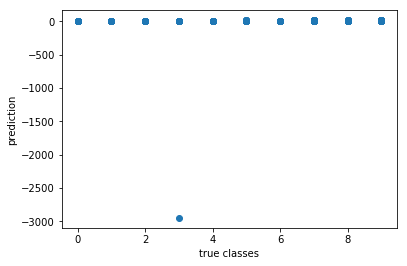

In [21]:
"""
scatter plot of prediction on MNIST data
"""
N = len(t)
x = test_labels[:]
y = pred[:]
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)
plt.xlabel('true classes')
plt.ylabel('prediction')
plt.show()

According to the scatter graph above, we got a outlet value. To visualize better this figure, we choose to omit this outlet and draw the scatter again.

outlet -7.772194 is in index 3394


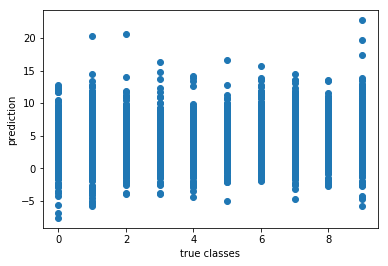

In [84]:
'''
Scatter plot on MNIST data - without outlet
'''
outlet = np.min(y)
index = y.tolist().index(outlet)
print("outlet %f is in index %d"%(outlet,index))
y = np.append(y[0:index],y[index+1:])
x = np.append(x[0:index],x[index+1:])
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
plt.xlabel('true classes')
plt.ylabel('prediction')
plt.scatter(x, y)
plt.show()

- Mean square error

In [85]:
SE = 0
for i in range(len(x)):
    SE += (x[i]-y[i])**2
MSE = SE/len(x)
print("MSE",MSE)

MSE 11.8438987271


#### 4.2.2  CIFAR 10 Data
- Scatter plot

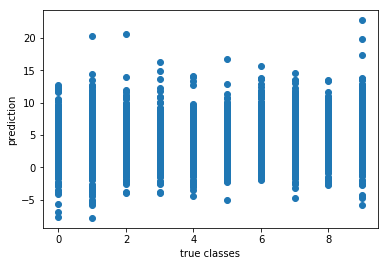

In [86]:
"""
scatter plot of prediction on CIFAR 10 data
"""
N = len(t)
x = test_labels_CF[:]
y = pred_c[:]
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)
plt.xlabel('true classes')
plt.ylabel('prediction')
plt.show()

- Mean square error


In [87]:
SE = 0
for i in range(len(x)):
    SE += (x[i]-y[i])**2
MSE = SE/len(x)
print("MSE:",MSE)

MSE: 11.850409476


### 4.3 Discretize predictions and display the confusion matrix
The output is a continues value set. In order to descretize the output to [0,9] integers, first we need to normalize(squeez) the output to a float number in [0,10), then get convert them to integer.


In [78]:
'''
remove the outlet value
'''
def remove_outlet(x):
    outlet = np.min(x)
    x = list(x)
    idx = x.index(outlet)
    return x[0:idx] + x[idx+1:]
def get_outlet_idx(x):
    x = list(x)
    idx = x.index(np.min(x))
    return idx
idx_m = get_outlet_idx(pred)
pred_m = remove_outlet(pred)


In [79]:
'''
descetize the value to the integers[0,9]
'''
def descretize(x):
    lower = np.min(x)
    x = x-lower #convert each element to make sure they start from 0
    upper = np.max(x)
    x = x/(upper+0.000001) #normalize each element to be in range[0,1)
    x = (x*10).astype(int)
    return x

#### 4.3.1 MNIST data  
- Descetize

In [80]:
'''normalize the data so that the value of points is converted to range [0,9]'''
result = descretize(pred_m)

- Evaluate the accuracy

In [81]:
'''evaluate the model by accuracy'''
error = 0
test_labels_m = np.append(test_labels[0:idx_m],test_labels[idx_m+1:])
for i in range(len(test_labels_m)):
    if result[i] != test_labels_m[i]:
        error += 1
print("accuracy:",1-error/float(len(test_labels_m)))    

accuracy: 0.16071607160716073


- Confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize = (20,8)) # create a 5 x 5 figure 
    ax = fig.add_subplot(111)
    ace = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    ax.set_title(title)

    fig.colorbar(ace)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
#     plt.figure(figsize=(15,8))
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 11 258 481 171  49  10   0   0   0   0]
 [  0   2 694 373  59   7   0   0   0   0]
 [  5  42 284 484 195  19   3   0   0   0]
 [  0   9 161 518 256  49  16   0   0   0]
 [  0   0   1  88 498 334  59   2   0   0]
 [  0   0  14 223 451 164  30   8   2   0]
 [  0   3  20 126 386 354  68   1   0   0]
 [  0   0   5  53 198 429 276  59   8   0]
 [  0   0   7  61 269 434 174  28   1   0]
 [  0   0   3  20  77 322 497  82   6   2]]


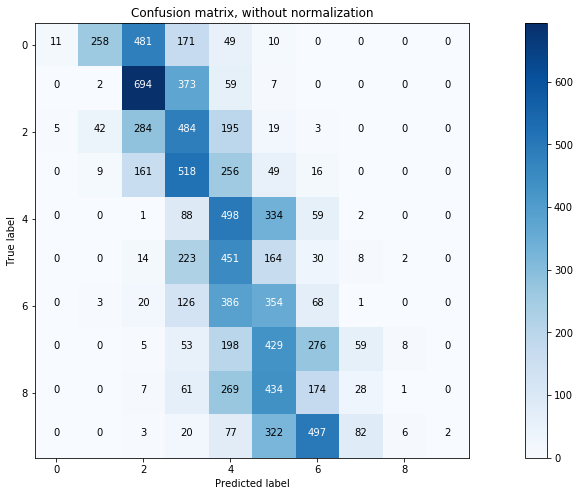

In [76]:
confusion = confusion_matrix(test_labels_m, result)
plt.figure()
plot_confusion_matrix(confusion, title='Confusion matrix, without normalization')

#### 4.3.2 CIFAR 10 data  
- Descetize

In [96]:
'''normalize the data so that the value of points is converted to range [0,9]'''

result_c = descretize(pred_c)


- Evaluate the accuracy

In [98]:
'''evaluate the model by accuracy'''
error_c = 0
for i in range(len(test_labels_CF)):
    if result_c[i] != test_labels_CF[i]:
        error_c += 1
print("accuracy:",1 - error_c/float(len(test_labels_CF)))    

accuracy: 0.10509999999999997


- Confusion matrix

Confusion matrix, without normalization
[[  3   9  56 489 395  39   9   0   0   0]
 [  5  11  88 399 392  85  18   1   0   1]
 [  0   6  65 467 394  61   5   1   0   1]
 [  0   6  63 456 417  50   5   3   0   0]
 [  0   9  58 439 450  40   2   2   0   0]
 [  1   4  57 477 408  48   4   0   1   0]
 [  0   2  65 397 433  85  14   4   0   0]
 [  1   4  71 346 466  93  17   2   0   0]
 [  0   6  37 371 492  89   4   1   0   0]
 [  2   7  45 304 478 142  16   3   1   2]]


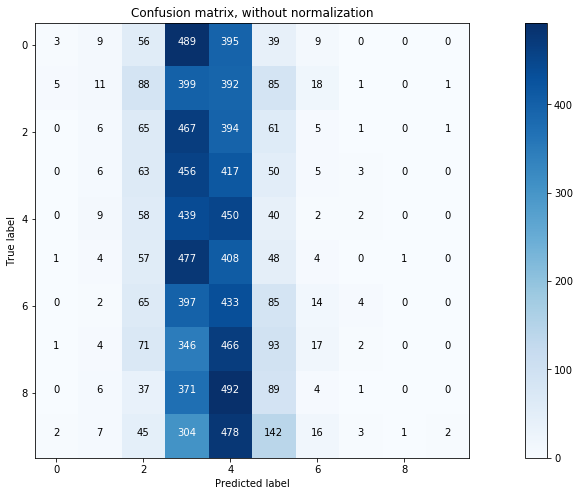

In [99]:
confusion = confusion_matrix(test_labels_CF, result_c)
plt.figure()
plot_confusion_matrix(confusion, title='Confusion matrix, without normalization')

### 4.4 Discuss regression performance with respect to classification performance

The result(acccuracy) we got above can be listed as below.  
  
**Naive Bayes Classifier:**
```
MNIST: 0.8438
CIFAR 10: 0.296
```
**Bayesian Linear Regression:**
```
MNIST:  0.1009
CIFAR 10: 0.1051
```
According to the accuracy, the Naive Bayes Classifier works better on these two data sets.  
  
The naive bayes classifier bases on applying Bayes' theorem with strong (naive) independence assumptions between the features. Given a training set, it builds the probabilistic model based on the frequencies of each data point. And it predicts the new value with the probability $P(C_j|{\bf{x}})$. So the theory behind Naive bayes is to use frequency to predict probability. 
  
When it comes to bayesian linear regression, first it assumes there is a linear relation between data **x** and the target **t**.  
i.e. $\bf{t = Xw}$. Here t is the target in [0,9], and **X** is the value of pixels in one single image.  
However, this is a dummy assumption because the relation between target and the pixels is much more complex than a linear map. In this case, we see that the result of the linear regression is nearly the random output.


### 4.4 Describe one limitation of using regression for this particular task
As discussed above, the limitation of the regression on image data set is that the linear assumption is not sufficient to describe the real model, hence result in a low accuracy.  
  
Another limitation is that linear regression is sensitive to outliers. e.g. in the MNIST datase we observed an outlier with the value = -2948, which is far beyond the target range [0,9]. 